## Question 1:
Consider the problem of maximizing the function.
<br><br>f(x)=((-x^2)/10)+3x
<br><br>where x is allowed to vary between 0 and 31. You must perform following tasks in the code.
- Representation of states (solutions): To solve this using a genetic algorithm, we must encode the possible values of x as chromosomes. For this problem, we will encode x as a binary integer of length 5. Thus the chromosomes for our genetic algorithm will be sequences of 0's and 1's with a length of 5 bits, and have a range from 0 (00000) to 31 (11111).
- Fitness function:
                   f(x)=((-x^2)/10)+3x
To begin the algorithm, we select an initial population of 10 chromosomes at random. The resulting initial population of chromosomes is shown in Table 1. Next we take the x-value that each chromosome represents and test its fitness with the fitness function. The resulting fitness values are recorded in the third column of Table 1.

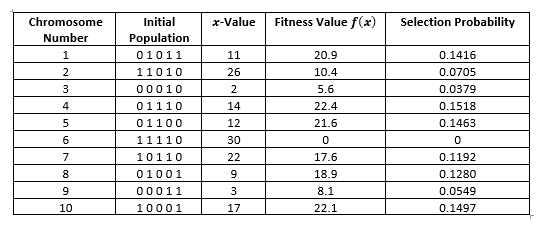

- Operators:
  - Apply cross over in every generation.
  - Apply mutation after every 3 generations.

- Termination criteria: Your loop should stop when the value of one of your candidate’s fitness function is greater or equal to 90%.

In [1]:
def fitness_fun(x):
    return (((-x)**2)/10)+3*x

def decimal_to_binary(num):
    return bin(num).replace("0b","")

def binary_to_decimal(num):
    return int(num,2)

def cross_over(chromosome1, chromosome2):
    index = random.randrange(0,5)
    child1 = chromosome1[:index] + chromosome2[index:]
    child2 = chromosome2[:index] + chromosome1[index:]
    return [child1, child2]

def mutation(chromosome):
    index = random.randrange(0,5)
    if (chromosome[index] == '0'):
        chromosome[index] = '1'
    else:
        chromosome[index] = '0'
    return chromosome

In [4]:
# Apply GA
import random
import datetime
random.seed()
gene = ['01011', '11010', '00010', '01110', '01100', '11110', '10110', '01001', '00011', '10001']

# First Best Fitness
bestGene = [gene[0]]
for i in range(len(gene)):
    if fitness_fun(binary_to_decimal(gene[i])) > fitness_fun(binary_to_decimal(bestGene[0])):
        bestGene[0] = gene[i]

# Second Best Fitness
bestGene.append(gene[1])
for i in range(len(gene)):    
    if gene[i] != bestGene[0] and fitness_fun(binary_to_decimal(gene[i])) > fitness_fun(binary_to_decimal(bestGene[1])):
        bestGene[1] = gene[i]

generation = 0
total = 0
while True:
    newChilds = cross_over(bestGene[0], bestGene[1])
    print("Generation ", total, " and childrens produced are ", newChilds);
    
    if generation == 3:
        newChilds[0] = mutation(newChilds[0])
        newChilds[1] = mutation(newChilds[1])
        generation = 0
    
    if fitness_fun(binary_to_decimal(newChilds[0])) > fitness_fun(binary_to_decimal(newChilds[1])):
        child = newChilds[0]
    else:
        child = newChilds[1]
    
    if fitness_fun(binary_to_decimal(child)) > fitness_fun(binary_to_decimal(bestGene[0])):
        bestGene[1] = bestGene[0]
        bestGene[0] = child
    elif fitness_fun(binary_to_decimal(child)) > fitness_fun(binary_to_decimal(bestGene[1])):
        bestGene[1] = child
    
    if fitness_fun(binary_to_decimal(bestGene[0])) >= 90:
        print(binary_to_decimal(bestGene[0]), ' has a fitness of ', fitness_fun(binary_to_decimal(bestGene[0])))
        break
    elif fitness_fun(bestGene[1]) >= 90:
        print(binary_to_decimal(bestGene[1]), ' has a fitness of ', fitness_fun(binary_to_decimal(bestGene[0])))
        break
    
    total = total + 1
    generation = generation + 1

Generation  0  and childrens produced are  ['11010', '11110']
30  has a fitness of  180.0


## Question 2:
For any given 'target' number, find an expression involving any legal combination of addition(+), subtraction(-), multiplication(*) and division(/) on digits that represents the given target number. For example, for the target 15, "9 + 3 * 2" is a solution."

## Question 3:
Suppose a TCS delivery boy has to deliver parcels from Head Office (MM Alam Road) to 7 different locations in Lahore (Johar Town, Shahdara, DHA Phase 6, Wapda Town, Askari 10, Allama Iqbal Town, Mall Road) and then return back to the Head Office. He wants to find the route with least travelling distance. You helped him in finding the route using Hill Climbing Algorithm. Now use Genetic Algorithm instead of Hill Climbing to solve this problem. Design choices should be as per class discussion. 
- [You can construct distance matrix using google maps OR you can take random values (between 0-50) for distances between any two spots.]

In [5]:
import random
class Graph:
    def __init__(self):
        self.graph = dict()
        
    def addVertex(self, ver):
        if ver in self.graph.keys():
            print("vertex ", ver, " already exists in graph")    
        else:
            self.graph[ver] = []
        
    def addEdge(self, verFrom, verTo, weight = None):
        if verFrom not in self.graph.keys():
            print("vertex ", verFrom, " not exists in graph")    
        elif verTo not in self.graph.keys():
            print("vertex ", verTo, " not exists in graph")
        else:
            if weight == None:
                self.graph[verFrom].append(verTo)
            else:
                self.graph[verFrom].append([verTo, weight])
                
    def printGraph(self):
        print(self.graph)
        
graph = Graph()
graph.addVertex('A')    # MM Alam Road
graph.addVertex('B')    # Johar Town
graph.addVertex('C')    # Shahdara
graph.addVertex('D')    # DHA Phase 6
graph.addVertex('E')    # Wapda Town
graph.addVertex('F')    # Askari 10
graph.addVertex('G')    # Allama Iqbal Town
graph.addVertex('H')    # Mall Road

graph.addEdge('A', 'B', random.randrange(0, 50))
graph.addEdge('A', 'C', random.randrange(0, 50))
graph.addEdge('A', 'D', random.randrange(0, 50))
graph.addEdge('A', 'E', random.randrange(0, 50))
graph.addEdge('A', 'F', random.randrange(0, 50))
graph.addEdge('A', 'G', random.randrange(0, 50))
graph.addEdge('A', 'H', random.randrange(0, 50))

graph.addEdge('B', 'A', random.randrange(0, 50))
graph.addEdge('B', 'C', random.randrange(0, 50))
graph.addEdge('B', 'D', random.randrange(0, 50))
graph.addEdge('B', 'E', random.randrange(0, 50))
graph.addEdge('B', 'F', random.randrange(0, 50))
graph.addEdge('B', 'G', random.randrange(0, 50))
graph.addEdge('B', 'H', random.randrange(0, 50))

graph.addEdge('C', 'A', random.randrange(0, 50))
graph.addEdge('C', 'B', random.randrange(0, 50))
graph.addEdge('C', 'D', random.randrange(0, 50))
graph.addEdge('C', 'E', random.randrange(0, 50))
graph.addEdge('C', 'F', random.randrange(0, 50))
graph.addEdge('C', 'G', random.randrange(0, 50))
graph.addEdge('C', 'H', random.randrange(0, 50))

graph.addEdge('D', 'A', random.randrange(0, 50))
graph.addEdge('D', 'B', random.randrange(0, 50))
graph.addEdge('D', 'C', random.randrange(0, 50))
graph.addEdge('D', 'E', random.randrange(0, 50))
graph.addEdge('D', 'F', random.randrange(0, 50))
graph.addEdge('D', 'G', random.randrange(0, 50))
graph.addEdge('D', 'H', random.randrange(0, 50))

graph.addEdge('E', 'A', random.randrange(0, 50))
graph.addEdge('E', 'B', random.randrange(0, 50))
graph.addEdge('E', 'C', random.randrange(0, 50))
graph.addEdge('E', 'D', random.randrange(0, 50))
graph.addEdge('E', 'F', random.randrange(0, 50))
graph.addEdge('E', 'G', random.randrange(0, 50))
graph.addEdge('E', 'H', random.randrange(0, 50))

graph.addEdge('F', 'A', random.randrange(0, 50))
graph.addEdge('F', 'B', random.randrange(0, 50))
graph.addEdge('F', 'C', random.randrange(0, 50))
graph.addEdge('F', 'D', random.randrange(0, 50))
graph.addEdge('F', 'E', random.randrange(0, 50))
graph.addEdge('F', 'G', random.randrange(0, 50))
graph.addEdge('F', 'H', random.randrange(0, 50))

graph.addEdge('G', 'A', random.randrange(0, 50))
graph.addEdge('G', 'B', random.randrange(0, 50))
graph.addEdge('G', 'C', random.randrange(0, 50))
graph.addEdge('G', 'D', random.randrange(0, 50))
graph.addEdge('G', 'E', random.randrange(0, 50))
graph.addEdge('G', 'F', random.randrange(0, 50))
graph.addEdge('G', 'H', random.randrange(0, 50))

graph.addEdge('H', 'A', random.randrange(0, 50))
graph.addEdge('H', 'B', random.randrange(0, 50))
graph.addEdge('H', 'C', random.randrange(0, 50))
graph.addEdge('H', 'D', random.randrange(0, 50))
graph.addEdge('H', 'E', random.randrange(0, 50))
graph.addEdge('H', 'F', random.randrange(0, 50))
graph.addEdge('H', 'G', random.randrange(0, 50))

In [6]:
# Apply GA
def fitness_fun(chromosome, graph):
    cost = 0
    for i in range(len(chromosome) - 1):
        edges = graph.graph.get(chromosome[i])
        for edge in edges:
            if edge[0] == chromosome[i + 1]:
                cost = cost + edge[1]
                break
    return cost

def cross_over(chromosome1, chromosome2):
    startingIndex = random.randrange(0, len(chromosome1) // 2)
    endingIndex = random.randrange(startingIndex + 1, len(chromosome1))
    
    chlid1 = [None] * len(chromosome1)
    chlid1[startingIndex:endingIndex] = chromosome1[startingIndex:endingIndex]
    chlid2 = [None] * len(chromosome1)
    chlid2[startingIndex:endingIndex] = chromosome2[startingIndex:endingIndex]
    
    index = endingIndex
    count = 0
    for i in range(0, len(chromosome1) - (endingIndex - startingIndex)):
        while chromosome2[(index + count) % len(chromosome1)] in chlid1:
            count = count + 1
        
        chlid1[index % len(chromosome1)] = chromosome2[(index + count) % len(chromosome1)]
        index = index + 1
    
    index = endingIndex
    count = 0
    for i in range(0, len(chromosome1) - (endingIndex - startingIndex)):
        while chromosome1[(index + count) % len(chromosome1)] in chlid2:
            count = count + 1
            
        chlid2[index % len(chromosome1)] = chromosome1[(index + count) % len(chromosome1)]
        index = index + 1
        
    return [chlid1, chlid2]

def mutation(chromosome):
    index1 = random.randrange(0, len(chromosome))
    index2 = random.randrange(0, len(chromosome))
    while index2 == index1:
        index2 = random.randrange(0, len(chromosome))
    
    i = chromosome[index1]
    chromosome[index1] = chromosome[index2]
    chromosome[index2] = i
    
    return chromosome

In [7]:
gene1 = ['A']
gene2 = ['A']
nodes = ['B', 'C', 'D', 'E', 'F', 'G', 'H']

for i in range(7):
    edge = random.choice(nodes)
    while edge in gene1:
        edge = random.choice(nodes)
    gene1.append(edge)
    
for i in range(7):
    edge = random.choice(nodes)
    while edge in gene2:
        edge = random.choice(nodes)
    gene2.append(edge)

bestGenes = None
if fitness_fun(gene1, graph) > fitness_fun(gene2, graph):
    bestGenes = [gene1, gene2]
else:
    bestGenes = [gene2, gene1]

print(bestGenes[0], fitness_fun(bestGenes[0], graph))
bestChild = None
count = 0
generation = 0
# for generation in range(100):
while True:
    childs = cross_over(bestGenes[0][1:], bestGenes[1][1:])
    
    childs[0] = mutation(childs[0])
    childs[1] = mutation(childs[1])
    childs[0].insert(0, 'A')
    childs[1].insert(0, 'A')
    
    if fitness_fun(childs[0], graph) < fitness_fun(childs[1], graph):
        bestChild = childs[0]
    else:
        bestChild = childs[1]
    
    if fitness_fun(bestGenes[0], graph) > fitness_fun(bestChild, graph):
        bestGenes[1] = bestGenes[0]
        bestGenes[0] = bestChild
        count = 0
    elif fitness_fun(bestGenes[1], graph) > fitness_fun(bestChild, graph):
        bestGenes[1] = bestChild
        count = 0
    else:
        count = count + 1
    
    print(bestGenes[0], fitness_fun(bestGenes[0], graph), "\t", generation)
    
    if count == 10:
        break
        
    generation = generation + 1

['A', 'C', 'D', 'F', 'H', 'B', 'E', 'G'] 226
['A', 'F', 'B', 'D', 'G', 'E', 'H', 'C'] 105 	 0
['A', 'F', 'B', 'D', 'G', 'E', 'H', 'C'] 105 	 1
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 2
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 3
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 4
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 5
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 6
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 7
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 8
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 9
['A', 'F', 'E', 'D', 'G', 'B', 'C', 'H'] 83 	 10
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 11
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 12
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 13
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 14
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 15
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 16
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 17
['A', 'F', 'B', 'H', 'C', 'G', 'E', 'D'] 66 	 18
['A', 'G', 'B', 'H', 'C', 'F', '